# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# let use the seaborn theme for plotting
sns.set()

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # capitalize the city name
    city = city.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# set the unit for temperature
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "appid=" + weather_api_key +"&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Iskateley
Processing Record 2 of Set 1 | Saldanha
Processing Record 3 of Set 1 | Karmaskaly
Processing Record 4 of Set 1 | Devinuwara
City not found. Skipping...
Processing Record 5 of Set 1 | Iqaluit
Processing Record 6 of Set 1 | Tayoltita
Processing Record 7 of Set 1 | Olonkinbyen
Processing Record 8 of Set 1 | Port elizabeth
Processing Record 9 of Set 1 | Mount isa
Processing Record 10 of Set 1 | Port-aux-francais
Processing Record 11 of Set 1 | Pecangaan
Processing Record 12 of Set 1 | Adamstown
Processing Record 13 of Set 1 | Alpena
Processing Record 14 of Set 1 | Bilibino
Processing Record 15 of Set 1 | Fort bragg
Processing Record 16 of Set 1 | Mossel bay
Processing Record 17 of Set 1 | Yellowknife
Processing Record 18 of Set 1 | Bethel
Processing Record 19 of Set 1 | Seven pagodas
Processing Record 20 of Set 1 | Qaqortoq
Processing Record 21 of Set 1 | Grytviken
Processing Record 22 of S

Processing Record 39 of Set 4 | Bria
Processing Record 40 of Set 4 | Witu
Processing Record 41 of Set 4 | Alo
Processing Record 42 of Set 4 | Storkow
Processing Record 43 of Set 4 | Lihue
Processing Record 44 of Set 4 | Fabens
Processing Record 45 of Set 4 | Saint-pierre
Processing Record 46 of Set 4 | Colonia
Processing Record 47 of Set 4 | Salmon arm
Processing Record 48 of Set 4 | Tobelo
Processing Record 49 of Set 4 | Sao vicente
Processing Record 0 of Set 5 | Carutapera
Processing Record 1 of Set 5 | Faya-largeau
Processing Record 2 of Set 5 | Mollendo
Processing Record 3 of Set 5 | Isle of lewis
City not found. Skipping...
Processing Record 4 of Set 5 | Pantai cenang
City not found. Skipping...
Processing Record 5 of Set 5 | I-n-salah
Processing Record 6 of Set 5 | Kantunilkin
Processing Record 7 of Set 5 | Ryotsu-minato
Processing Record 8 of Set 5 | Lazaro cardenas
Processing Record 9 of Set 5 | Yangor
City not found. Skipping...
Processing Record 10 of Set 5 | Zarghun shahr
Pr

Processing Record 26 of Set 8 | Ivdel'
Processing Record 27 of Set 8 | Merzifon
Processing Record 28 of Set 8 | Kailua-kona
Processing Record 29 of Set 8 | Kuqa
Processing Record 30 of Set 8 | Coquimbo
Processing Record 31 of Set 8 | Chilecito
Processing Record 32 of Set 8 | Rikaze
Processing Record 33 of Set 8 | Cooma
Processing Record 34 of Set 8 | Mtwara
Processing Record 35 of Set 8 | Revda
Processing Record 36 of Set 8 | Griffith
Processing Record 37 of Set 8 | Kingston
Processing Record 38 of Set 8 | Veshkayma
Processing Record 39 of Set 8 | Floro
Processing Record 40 of Set 8 | Peace river
Processing Record 41 of Set 8 | Kalabo
Processing Record 42 of Set 8 | Plettenberg bay
Processing Record 43 of Set 8 | Rabaul
Processing Record 44 of Set 8 | Brisas de zicatela
Processing Record 45 of Set 8 | Saint johnsbury
Processing Record 46 of Set 8 | Hereford
Processing Record 47 of Set 8 | Thurso
Processing Record 48 of Set 8 | Peterhead
Processing Record 49 of Set 8 | Achinsk
Processin

City not found. Skipping...
Processing Record 22 of Set 12 | Pamanukan
Processing Record 23 of Set 12 | Hengchun
Processing Record 24 of Set 12 | Okhotsk
Processing Record 25 of Set 12 | Bargara
City not found. Skipping...
Processing Record 26 of Set 12 | As sulayyil
Processing Record 27 of Set 12 | Baruun-urt
Processing Record 28 of Set 12 | Gurupa
Processing Record 29 of Set 12 | Moyale
Processing Record 30 of Set 12 | Murudeshwara
Processing Record 31 of Set 12 | Flying fish cove
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# show the dataframe info
city_data_df.info()

# Show Record Count
city_data_df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        550 non-null    object 
 1   Lat         550 non-null    float64
 2   Lng         550 non-null    float64
 3   Max Temp    550 non-null    float64
 4   Humidity    550 non-null    int64  
 5   Cloudiness  550 non-null    int64  
 6   Wind Speed  550 non-null    float64
 7   Country     550 non-null    object 
 8   Date        550 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.8+ KB


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iskateley,67.6803,53.1512,12.93,96,100,5.13,RU,1695571546
1,Saldanha,-33.0117,17.9442,13.73,89,99,2.39,ZA,1695571547
2,Karmaskaly,54.3709,56.1837,14.95,70,1,2.14,RU,1695571547
3,Iqaluit,63.7506,-68.5145,3.85,80,40,6.71,CA,1695571327
4,Tayoltita,24.0833,-105.9333,29.14,40,17,0.65,MX,1695571547


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Iskateley,67.6803,53.1512,12.93,96,100,5.13,RU,1695571546
1,Saldanha,-33.0117,17.9442,13.73,89,99,2.39,ZA,1695571547
2,Karmaskaly,54.3709,56.1837,14.95,70,1,2.14,RU,1695571547
3,Iqaluit,63.7506,-68.5145,3.85,80,40,6.71,CA,1695571327
4,Tayoltita,24.0833,-105.9333,29.14,40,17,0.65,MX,1695571547


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [30]:
# define funtion to create, display, and save the scatter plots
def show_plot(x_values, y_values, title, xlabel, ylabel, save_file):
    plt.scatter(x_values,y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title + " (" + weather_date + ")")
    
    # save the file
    plt.savefig("output_data/" + save_file)
    
    plt.show()

# get the timestamp value from the cities dataframe and convert to date.
weather_date = time.strftime('%Y-%m-%d', time.localtime(city_data_df.iloc[0, -1]))
print("Weather Date:", weather_date)

Weather Date: 2023-09-24


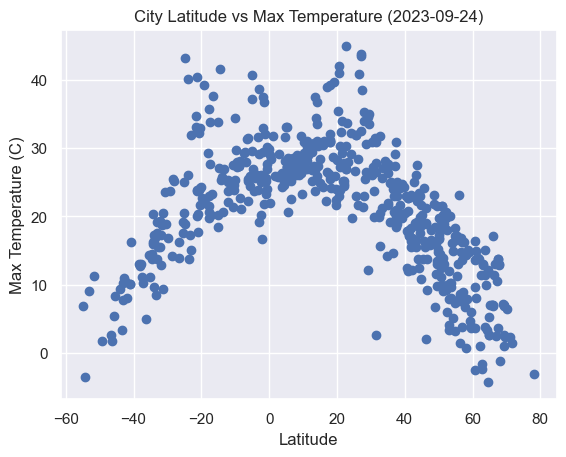

In [33]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

show_plot(x_values, y_values, "City Latitude vs Max Temperature", 
         "Latitude", "Max Temperature (C)", "Fig1.png")

#### Latitude Vs. Humidity

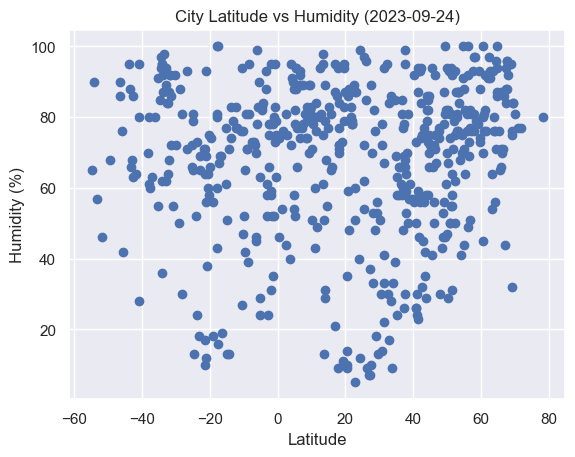

In [34]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

show_plot(x_values, y_values, "City Latitude vs Humidity", 
         "Latitude", "Humidity (%)", "Fig2.png")

#### Latitude Vs. Cloudiness

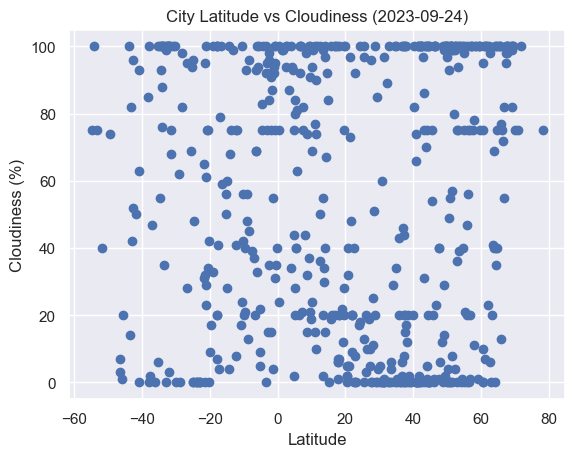

In [36]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

show_plot(x_values, y_values, "City Latitude vs Cloudiness", 
         "Latitude", "Cloudiness (%)", "Fig3.png")

#### Latitude vs. Wind Speed Plot

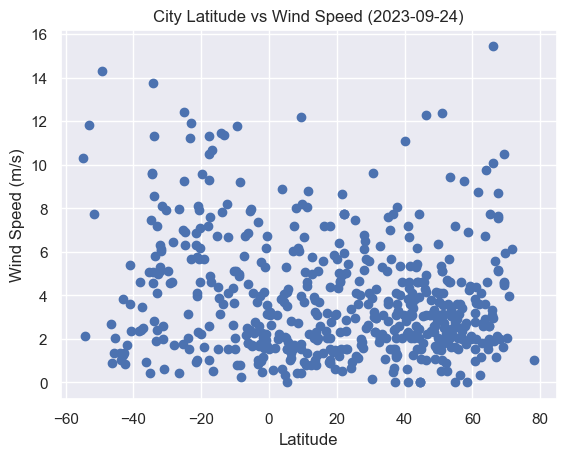

In [37]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

show_plot(x_values, y_values, "City Latitude vs Wind Speed", 
         "Latitude", "Wind Speed (m/s)", "Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def show_reg_plot(x_values, y_values, xlabel, ylabel, annot_x, annot_y):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print r square value
    print(f"The R-squared value is: {rvalue**2}")
    
    # Plot scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values,"r--")
    plt.annotate(line_eq,(annot_x,annot_y), fontsize=15, color="red")

    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show plot
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Iskateley,67.6803,53.1512,12.93,96,100,5.13,RU,1695571546
2,Karmaskaly,54.3709,56.1837,14.95,70,1,2.14,RU,1695571547
3,Iqaluit,63.7506,-68.5145,3.85,80,40,6.71,CA,1695571327
4,Tayoltita,24.0833,-105.9333,29.14,40,17,0.65,MX,1695571547
5,Olonkinbyen,70.9221,-8.7187,2.28,77,75,3.97,SJ,1695571547


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Saldanha,-33.0117,17.9442,13.73,89,99,2.39,ZA,1695571547
6,Port elizabeth,-33.9180,25.5701,17.28,92,100,11.32,ZA,1695571253
7,Mount isa,-20.7333,139.5000,23.87,38,75,5.66,AU,1695571547
8,Port-aux-francais,-49.3500,70.2167,1.68,68,74,14.28,TF,1695571547
9,Pecangaan,-6.6978,110.7107,27.92,72,20,2.19,ID,1695571547


###  Temperature vs. Latitude Linear Regression Plot

The R-squared value is: 0.6324244502367536


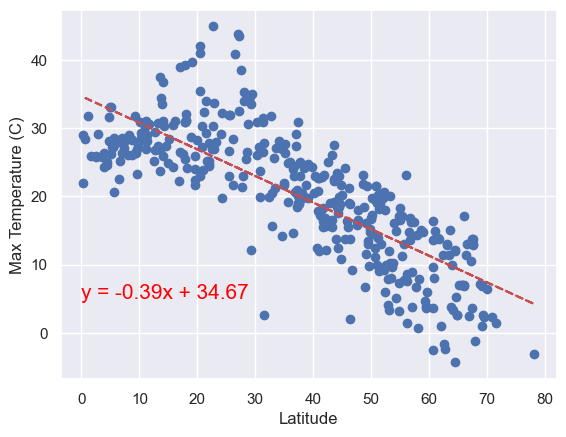

In [45]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

show_reg_plot(x_values, y_values, "Latitude", "Max Temperature (C)", 0, 5)

The R-squared value is: 0.5419742378078057


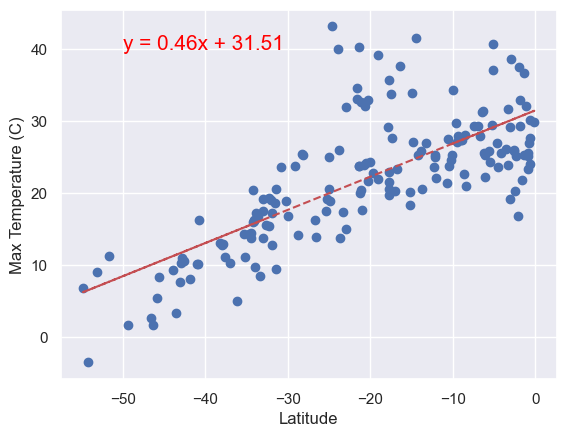

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

show_reg_plot(x_values, y_values, "Latitude", "Max Temperature (C)", -50, 40)

**Discussion about the linear relationship:** In both the northern and southern hemispheres there is a moderate correlation between latitude and temperature. As we move towards the Equator, the temperature increases as expected. However, based on the r-squared values there are clearly other factors that help determin temperature. 

### Humidity vs. Latitude Linear Regression Plot

The R-squared value is: 0.01610690389970532


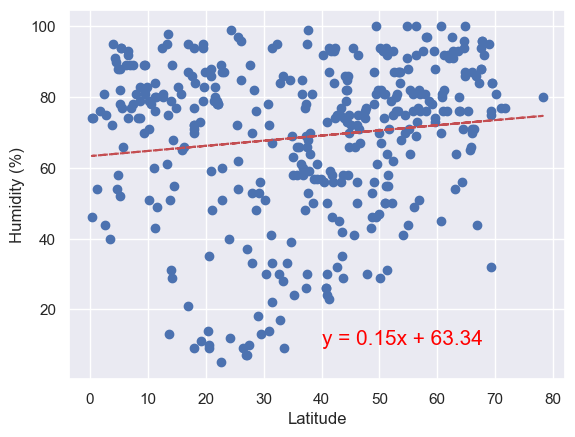

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

show_reg_plot(x_values, y_values, "Latitude", "Humidity (%)", 40, 10)

The R-squared value is: 0.014896479243177977


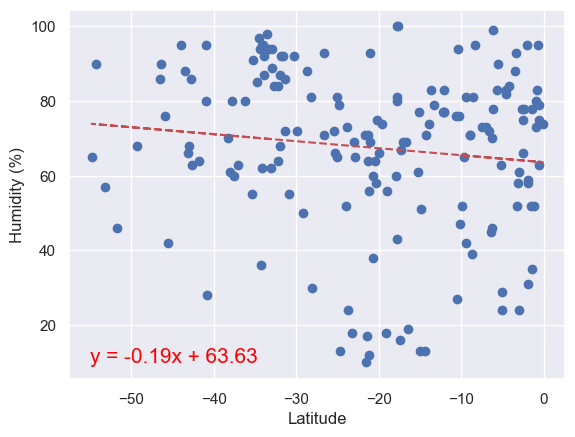

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

show_reg_plot(x_values, y_values, "Latitude", "Humidity (%)", -55, 10)

**Discussion about the linear relationship:** In both the northern and southern hemisphere there is no linear correlation between percent humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared value is: 0.014051322188459723


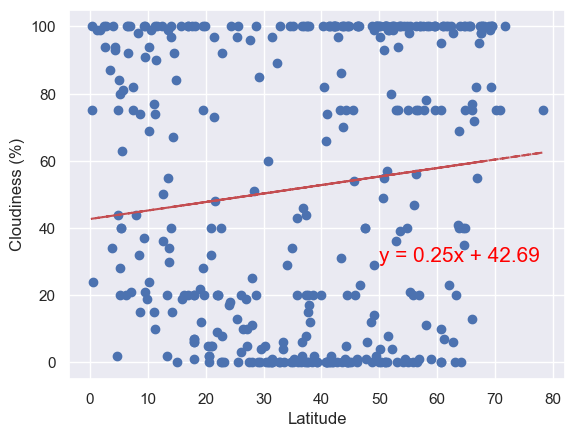

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

show_reg_plot(x_values, y_values, "Latitude", "Cloudiness (%)", 50, 30)

The R-squared value is: 0.0004092148594036443


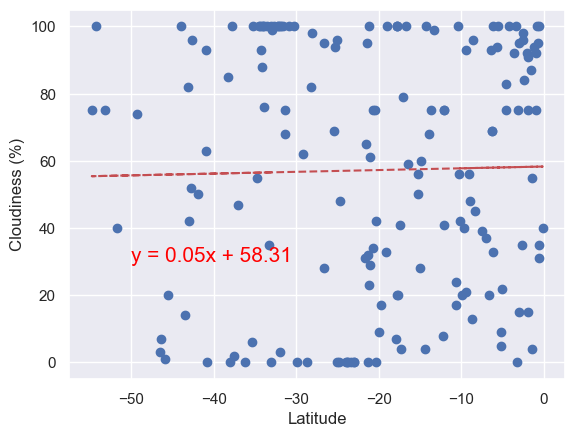

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

show_reg_plot(x_values, y_values, "Latitude", "Cloudiness (%)", -50, 30)

**Discussion about the linear relationship:** In both the northern and southern hemisphere there is no linear correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared value is: 0.0033355625531808404


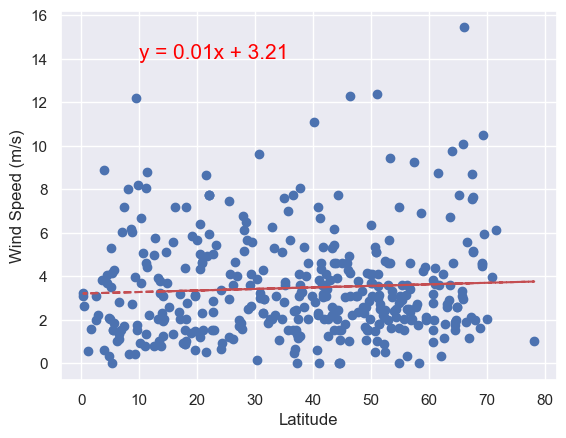

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

show_reg_plot(x_values, y_values, "Latitude", "Wind Speed (m/s)", 10, 14)

The R-squared value is: 0.020615735142894224


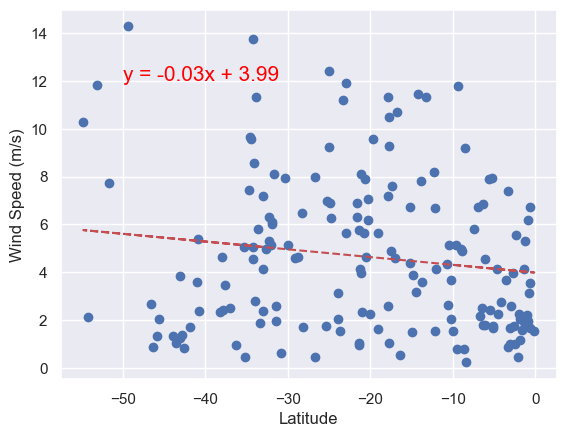

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

show_reg_plot(x_values, y_values, "Latitude", "Wind Speed (m/s)", -50, 12)

**Discussion about the linear relationship:** In both the northern and southern hemisphere there is no linear correlation between wind speed and latitude.